# Using Local Sentence Embeddings to save API calls.
We can download a pre-trained embedding model and run it locally. This can save a lot of time of money and time.


In [ ]:
!pip install sentence-transformers

In [10]:
from sentence_transformers import SentenceTransformer

sentences = [
    "Love good things and all humans, animals and be kind to the nature", 
    "!@#$%^&*() 123 technical math equations artificial intelligence "
]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(f"Got embeddings with shape {embeddings.shape}")

Got embeddings with shape (2, 384)


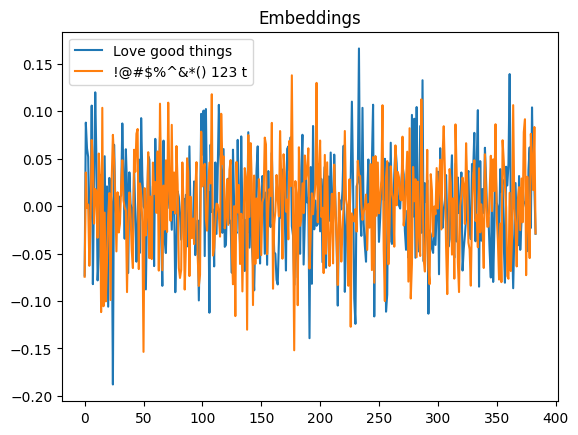

In [12]:
from matplotlib.pylab import plot, title, legend, show
for e, text in zip(embeddings, sentences):
    plot(e, label=text[:16])
legend()
title('Embeddings')
show()